## Project Name: Automatic Optimal N-Shot learning for Brain Tumor Detection. (Using CNN)
**Description:**

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

Despite deep convolutional neural networks achieved impressive progress in medical image computing and analysis, its paradigm of supervised learning demands a large number of training images and complex hyperparameter optimization processes. In clinical practices, collection of huge number of MRIs is difficult to acquire. We developed a deep learning pipeline with few-shot learning with automatic hyperparameter optimization for brain tumor detection.

In [1]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Importing required Libraries:
import cv2
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

2023-11-29 19:36:28.244804: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 19:36:28.423650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 19:36:28.423709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 19:36:28.456346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 19:36:28.522851: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 19:36:28.523946: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
# Datapath:
data_path = "../../around-250-images/"

In [6]:
# shape of image:
im = cv2.imread(data_path + 'yes/Y1.jpg')
print(im.shape)

(218, 180, 3)


In [7]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
train_DataGen = ImageDataGenerator(
                                   rescale = 1./255,
                                   rotation_range = 20,
                                   validation_split = 0.2
                                   )

In [8]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
training_data = train_DataGen.flow_from_directory(
                                                  directory = data_path,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  subset = 'training'
                                                 )

Found 406 images belonging to 3 classes.


In [9]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
validation_data = train_DataGen.flow_from_directory(
                                                    directory = data_path,
                                                    target_size = (128,128),
                                                    batch_size = 3,
                                                    class_mode = 'binary',
                                                    subset = 'validation'
                                                   )

Found 100 images belonging to 3 classes.


In [10]:
# Training data class labels:
training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
# Validation data class labels:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
# creating function for plotting images:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

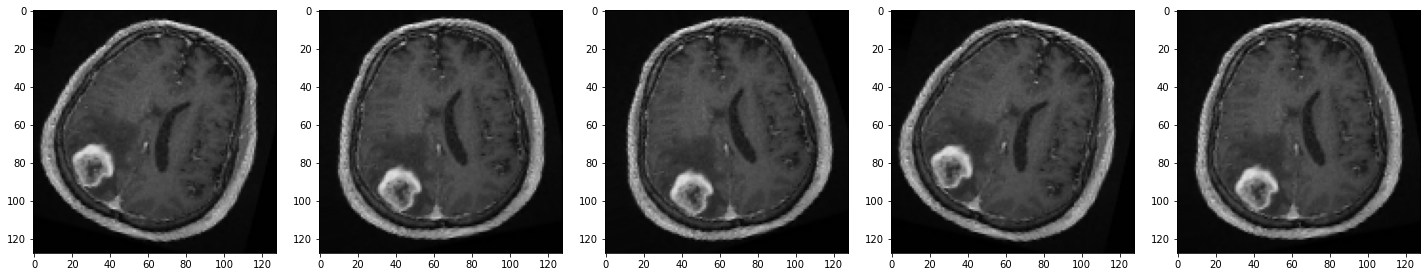

In [13]:
# Plotting images:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [14]:
# Creating model:
model = Sequential()

# Convolutional layer:
model.add(Conv2D(input_shape = (128,128,3), activation = 'relu', filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 256, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Dropout layer:
model.add(Dropout(0.5))

# Flatten layer:
model.add(Flatten())

# Dense layer:
model.add(Dense(64, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.2))

# Dense layer:
model.add(Dense(128, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.4))

# Dense layer:
model.add(Dense(256, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.5))

# Output layer:
model.add(Dense(2, activation = 'softmax'))

2023-11-29 19:36:32.876365: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-29 19:36:32.876791: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
# model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                        

In [16]:
# compile the model:
model.compile(
              optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [17]:
# Used Early stopping to avoid overfitting 
callback = tf.keras.callbacks.EarlyStopping(
                                            monitor='val_loss', 
                                            mode = 'min', 
                                            patience=5
                                           )

In [18]:
# Fitting the training data to our model:
history = model.fit_generator(
                              training_data,
                              validation_data = validation_data,
                              epochs = 100,
                              verbose = 0,
                              shuffle = True,
                              callbacks = [callback]
                             )

/tmp/ipykernel_6906/2390283867.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-11-29 19:36:34.206789: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-11-29 19:36:34.252377: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-11-29 19:36:34.307968: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-11-29 19:36:34.335964: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-11-29 19:36:34.456612: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 2 which is outside the valid range o

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>

  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance

  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start

  File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 450, in process_one

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell

  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 652, in execute_request

  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute

  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 532, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell

  File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes

  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code

  File "/tmp/ipykernel_6906/2390283867.py", line 2, in <module>

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/home/panda/.local/lib/python3.10/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 2 1 1 2 0 0 2 1 0 1 0 2 1 0 0 0 2 0 1 1 0 2 1 0 1 0 2 2 0 1 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1878]

In [ ]:
type(model)

In [ ]:
# On which iteration early stopping is called:
len(history.history['loss'])

In [ ]:
results = model.evaluate(validation_data)
results

In [ ]:
print('Test accuracy : ', results[1])

In [ ]:
# Summarize history for accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
# summarize history for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()